<a href="https://colab.research.google.com/github/JanOmasta/Python/blob/main/Project%203%20-%20Berkshire%20Hathaway%20-%20stock%20price/Berkshire_Hathaway_stock_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# This program shows Berkshire Hathaway Inc. (BRK-B) stock close price for all trading days of January 2021 (from 4th January 2021 until 29th January 2021). 
# The input data have been downloaded from https://finance.yahoo.com/quote/BRK-B/history?p=BRK-B as a csv file. 
# Currency in USD. The stock is traded on NYSE.

# Import the libraries.
from sklearn.svm import SVR
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')

In [45]:
# Load the data.
from google.colab import files
files.upload()

Saving BRK-B data.csv to BRK-B data.csv


{'BRK-B data.csv': b'Date,Open,High,Low,Close,Adj Close,Volume\n2021-01-04,231.729996,231.869995,226.850006,228.449997,228.449997,7404900\n2021-01-05,228.210007,230.100006,226.850006,227.470001,227.470001,5524900\n2021-01-06,229.490005,232.679993,227.550003,230.270004,230.270004,9009400\n2021-01-07,232.779999,233.960007,231.330002,232.880005,232.880005,4691600\n2021-01-08,233.539993,234.600006,231.720001,234.029999,234.029999,4850400\n2021-01-11,231.220001,233.919998,231.020004,233.429993,233.429993,3882000\n2021-01-12,233.309998,233.979996,231.699997,233.029999,233.029999,5616600\n2021-01-13,232.000000,234.949997,231.710007,234.509995,234.509995,3827500\n2021-01-14,234.789993,235.699997,233.839996,235.020004,235.020004,4528700\n2021-01-15,234.100006,234.589996,231.910004,233.490005,233.490005,5225000\n2021-01-19,234.639999,236.240005,231.699997,234.550003,234.550003,5502100\n2021-01-20,234.000000,235.199997,233.240005,234.759995,234.759995,4876200\n2021-01-21,235.220001,236.199997,234

In [47]:
# Store the data.
df = pd.read_csv('BRK-B data.csv')
# Show the data.
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-04,231.729996,231.869995,226.850006,228.449997,228.449997,7404900
1,2021-01-05,228.210007,230.100006,226.850006,227.470001,227.470001,5524900
2,2021-01-06,229.490005,232.679993,227.550003,230.270004,230.270004,9009400
3,2021-01-07,232.779999,233.960007,231.330002,232.880005,232.880005,4691600
4,2021-01-08,233.539993,234.600006,231.720001,234.029999,234.029999,4850400
5,2021-01-11,231.220001,233.919998,231.020004,233.429993,233.429993,3882000
6,2021-01-12,233.309998,233.979996,231.699997,233.029999,233.029999,5616600
7,2021-01-13,232.000000,234.949997,231.710007,234.509995,234.509995,3827500
8,2021-01-14,234.789993,235.699997,233.839996,235.020004,235.020004,4528700
9,2021-01-15,234.100006,234.589996,231.910004,233.490005,233.490005,5225000


In [53]:
# Show and store the last row of data (the newest close price).
actual_price = df.tail(1)

# Show the data.
actual_price

,Date,Open,High,Low,Close,Adj Close,Volume
18,2021-01-29,229.449997,229.970001,227.210007,227.869995,227.869995,6387300


In [54]:
# Create empty lists
trading_days = []
adj_close_prices = []

In [55]:
# Get only the dates.
df_days = df['Date']
df_days

0     2021-01-04
1     2021-01-05
2     2021-01-06
3     2021-01-07
4     2021-01-08
5     2021-01-11
6     2021-01-12
7     2021-01-13
8     2021-01-14
9     2021-01-15
10    2021-01-19
11    2021-01-20
12    2021-01-21
13    2021-01-22
14    2021-01-25
15    2021-01-26
16    2021-01-27
17    2021-01-28
18    2021-01-29
Name: Date, dtype: object

In [56]:
# Create the independent data set (dates). 
for day in df_days:
    trading_days.append([int(day.split('-')[2])]) 
trading_days

[[4],
 [5],
 [6],
 [7],
 [8],
 [11],
 [12],
 [13],
 [14],
 [15],
 [19],
 [20],
 [21],
 [22],
 [25],
 [26],
 [27],
 [28],
 [29]]

In [57]:
# Get only the adjusted close prices.
df_adj_close = df['Adj Close']
df_adj_close

0     228.449997
1     227.470001
2     230.270004
3     232.880005
4     234.029999
5     233.429993
6     233.029999
7     234.509995
8     235.020004
9     233.490005
10    234.550003
11    234.759995
12    234.160004
13    232.919998
14    233.009995
15    231.570007
16    227.360001
17    230.949997
18    227.869995
Name: Adj Close, dtype: float64

In [58]:
# Create the dependent data set (adj close prices).
for adj_close_price in df_adj_close:
    adj_close_prices.append(round(adj_close_price, 2))
adj_close_prices

[228.45,
 227.47,
 230.27,
 232.88,
 234.03,
 233.43,
 233.03,
 234.51,
 235.02,
 233.49,
 234.55,
 234.76,
 234.16,
 232.92,
 233.01,
 231.57,
 227.36,
 230.95,
 227.87]

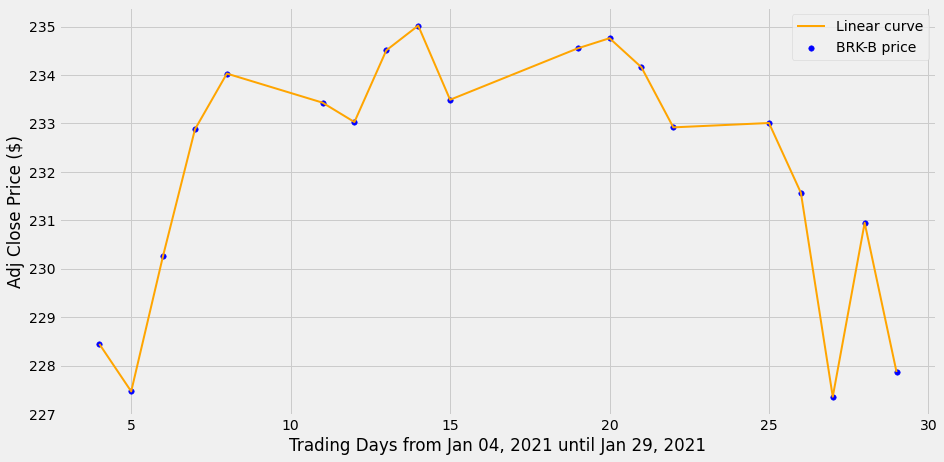

In [83]:
# Plot the data.
plt.figure(figsize=(14, 7))
plt.scatter(trading_days, adj_close_prices, s = 30, color = 'blue', label = 'BRK-B price')
plt.plot(trading_days, adj_close_prices, linewidth = 2, color = 'orange', label = 'Linear curve')

plt.xlabel('Trading Days from Jan 04, 2021 until Jan 29, 2021')
plt.ylabel('Adj Close Price ($)')
plt.legend()
plt.show()